## Итоговая домашняя работа по предмету "Большие данные в финансах"
### Выполнил: Шахманов Владислав Анатольевич

### Импорт библиотек и загрузка файлов

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np

### Часть 1. Динамика курса рубля

In [30]:
# Загрузка файла с курсом рубля
ruble_rate = pd.read_excel("RC_F01_12_2018_T01_12_2023.xlsx")

/Users/vladislavshakhmanov/anaconda3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [31]:
# Смотрю, что за данные передо мной и как они представлены
ruble_rate.head(1), ruble_rate.info

(   nominal       data     curs         cdx
 0        1 2023-12-01  88.5819  Доллар США,
 <bound method DataFrame.info of       nominal       data     curs         cdx
 0           1 2023-12-01  88.5819  Доллар США
 1           1 2023-11-30  88.8841  Доллар США
 2           1 2023-11-29  88.6102  Доллар США
 3           1 2023-11-28  88.7045  Доллар США
 4           1 2023-11-25  88.8133  Доллар США
 ...       ...        ...      ...         ...
 1227        1 2018-12-07  66.7377  Доллар США
 1228        1 2018-12-06  66.8242  Доллар США
 1229        1 2018-12-05  66.4467  Доллар США
 1230        1 2018-12-04  66.2921  Доллар США
 1231        1 2018-12-01  66.5335  Доллар США
 
 [1232 rows x 4 columns]>)

In [32]:
# Удаляю ненужные столбцы
del ruble_rate['nominal'], ruble_rate['cdx']

In [33]:
# Преобразую даты в нужный мне формат
ruble_rate.data = ruble_rate.data.astype(str)
for i in ruble_rate.index:
    ruble_rate.data[i] = str(ruble_rate.data[i])[0:7]

/var/folders/lc/gq9gmfgj2bz496xqttsl9hzr0000gn/T/ipykernel_73947/1321468965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ruble_rate.data[i] = str(ruble_rate.data[i])[0:7]
/var/folders/lc/gq9gmfgj2bz496xqttsl9hzr0000gn/T/ipykernel_73947/1321468965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ruble_rate.data[i] = str(ruble_rate.data[i])[0:7]
/var/folders/lc/gq9gmfgj2bz496xqttsl9hzr0000gn/T/ipykernel_73947/1321468965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [34]:
# Проверяю, что все идет как задумано
ruble_rate.head(5)

,data,curs
0,2023-12,88.5819
1,2023-11,88.8841
2,2023-11,88.6102
3,2023-11,88.7045
4,2023-11,88.8133


In [35]:
# Нахожу среднее значение для каждого месяца
ruble_rate = ruble_rate.groupby('data').mean()
ruble_rate.head(5)

,curs
data,
2018-12,67.335314
2019-01,66.512544
2019-02,65.810525
2019-03,65.092257
2019-04,64.603105


In [36]:
# Сбрасываю индексы для дальнейшей работы
ruble_rate = ruble_rate.reset_index()
ruble_rate.head(1)

,data,curs
0,2018-12,67.335314


In [37]:
# Сортирую по возрастанию
ruble_rate.sort_values(by = 'data', inplace = True)
ruble_rate = ruble_rate.reset_index() 
ruble_rate.head(5)

,index,data,curs
0,0,2018-12,67.335314
1,1,2019-01,66.512544
2,2,2019-02,65.810525
3,3,2019-03,65.092257
4,4,2019-04,64.603105


In [38]:
# Удаляю ненужную колонку
del ruble_rate['index']

In [39]:
# Проверяю, что все корректно
ruble_rate

,data,curs
0,2018-12,67.335314
1,2019-01,66.512544
2,2019-02,65.810525
3,2019-03,65.092257
4,2019-04,64.603105
...,...,...
56,2023-08,95.285348
57,2023-09,96.622259
58,2023-10,97.122281
59,2023-11,90.412790


### Часть 2. Динамика курса рубля

In [44]:
# Загружаю данные с индексом цен
price_index = pd.read_csv("russia.index.cpi (statbureau.org).csv")

In [46]:
# Смотрю что за данные
price_index

,Год,Январь,Февраль,Март,Апрель,Май,Июнь,Июль,Август,Сентябрь,Октябрь,Ноябрь,Декабрь
27,2018,100.31,100.21,100.29,100.38,100.38,100.49,100.27,100.01,100.16,100.35,100.50,100.84
28,2019,101.01,100.44,100.32,100.29,100.34,100.04,100.20,99.76,99.84,100.13,100.28,100.36
29,2020,100.40,100.33,100.55,100.83,100.27,100.22,100.35,99.96,99.93,100.43,100.71,100.83
30,2021,100.67,100.78,100.66,100.58,100.74,100.69,100.31,100.17,100.60,101.11,100.96,100.82
31,2022,100.99,101.17,107.61,101.56,100.12,99.65,99.61,99.48,100.05,100.18,100.37,100.78
32,2023,100.84,100.46,100.37,100.38,100.31,100.37,100.63,100.28,100.87,100.83,NaN,NaN


In [47]:
# Выбираю только нужные 5 лет
price_index = price_index[price_index['Год'] >= 2018]
price_index.head(5)

,Год,Январь,Февраль,Март,Апрель,Май,Июнь,Июль,Август,Сентябрь,Октябрь,Ноябрь,Декабрь
27,2018,100.31,100.21,100.29,100.38,100.38,100.49,100.27,100.01,100.16,100.35,100.50,100.84
28,2019,101.01,100.44,100.32,100.29,100.34,100.04,100.20,99.76,99.84,100.13,100.28,100.36
29,2020,100.40,100.33,100.55,100.83,100.27,100.22,100.35,99.96,99.93,100.43,100.71,100.83
30,2021,100.67,100.78,100.66,100.58,100.74,100.69,100.31,100.17,100.60,101.11,100.96,100.82
31,2022,100.99,101.17,107.61,101.56,100.12,99.65,99.61,99.48,100.05,100.18,100.37,100.78


In [48]:
# Меняю столбцы и строки местами для удобства обработки
price_index = price_index.T
price_index

,27,28,29,30,31,32
Год,2018.00,2019.00,2020.00,2021.00,2022.00,2023.00
Январь,100.31,101.01,100.40,100.67,100.99,100.84
Февраль,100.21,100.44,100.33,100.78,101.17,100.46
Март,100.29,100.32,100.55,100.66,107.61,100.37
Апрель,100.38,100.29,100.83,100.58,101.56,100.38
Май,100.38,100.34,100.27,100.74,100.12,100.31
Июнь,100.49,100.04,100.22,100.69,99.65,100.37
Июль,100.27,100.20,100.35,100.31,99.61,100.63
Август,100.01,99.76,99.96,100.17,99.48,100.28
Сентябрь,100.16,99.84,99.93,100.60,100.05,100.87


In [49]:
# Переименовываю столбцы для удобства работы
price_index.columns = ['One', 'Two', 'Three', 'Four', 'Five', 'Six']

In [50]:
price_index.head(2)

,One,Two,Three,Four,Five,Six
Год,2018.00,2019.00,2020.0,2021.00,2022.00,2023.00
Январь,100.31,101.01,100.4,100.67,100.99,100.84


In [51]:
# Записываю данные в список, без учета нулевых значений 
# (данные за последние два месяца еще не вышли)
price_index_lst = []
for i in range(len(price_index.One)):
    if i > 11:
        price_index_lst.append(price_index.One[i])
for i in range(len(price_index.One)):
    if i != 0:
        price_index_lst.append(price_index.Two[i])
for i in range(len(price_index.One)):
    if i != 0:
        price_index_lst.append(price_index.Three[i])
for i in range(len(price_index.One)):
    if i != 0:
        price_index_lst.append(price_index.Four[i])
for i in range(len(price_index.One)):
    if i != 0:
        price_index_lst.append(price_index.Five[i])
for i in range(len(price_index.One)):
    if i != 0 and i < 11:
        price_index_lst.append(price_index.Six[i])

### Часть 3. Графики для курса рубля и индекса цен

Text(55, 51, 'Декабрь 2023')

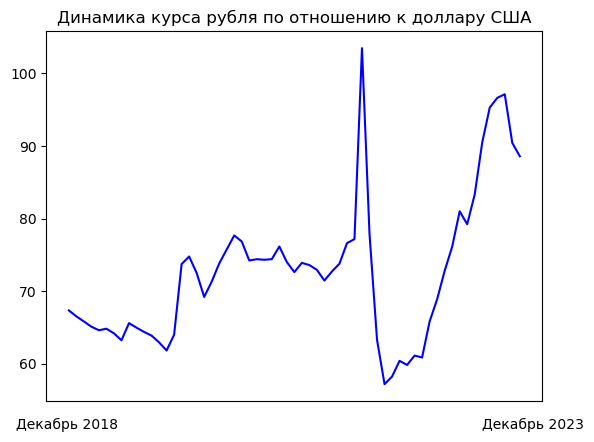

In [86]:
# График для курса рубля
plt.plot(ruble_rate.curs, color='blue')
plt.title('Динамика курса рубля по отношению к доллару США')
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
plt.text(-7, 51, 'Декабрь 2018')
plt.text(55, 51, 'Декабрь 2023')

Text(54, 98.5, 'Декабрь 2023')

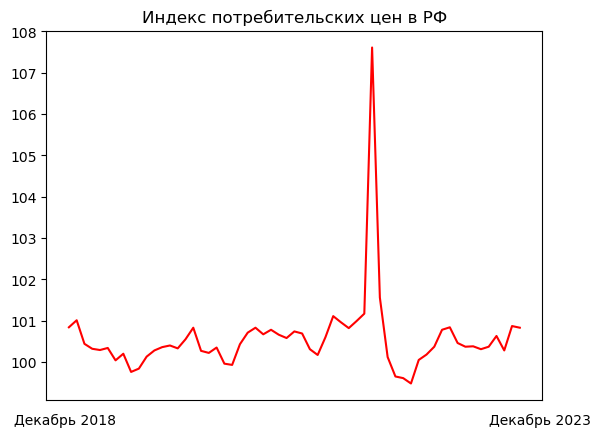

In [87]:
plt.plot(price_index_lst, color='red')
plt.title('Индекс потребительских цен в РФ')
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
plt.text(-7, 98.5, 'Декабрь 2018')
plt.text(54, 98.5, 'Декабрь 2023')

### Часть 4. Нормализую данные и совмещаю графики для поиска закономерностей

In [82]:
from sklearn import preprocessing
import numpy as np

numpy_ruble_rate = np.array(ruble_rate['curs'])
normalized_ruble_rate = preprocessing.normalize([numpy_ruble_rate])

numpy_price_index = np.array(price_index_lst)
normalized_price_index = preprocessing.normalize([numpy_price_index])

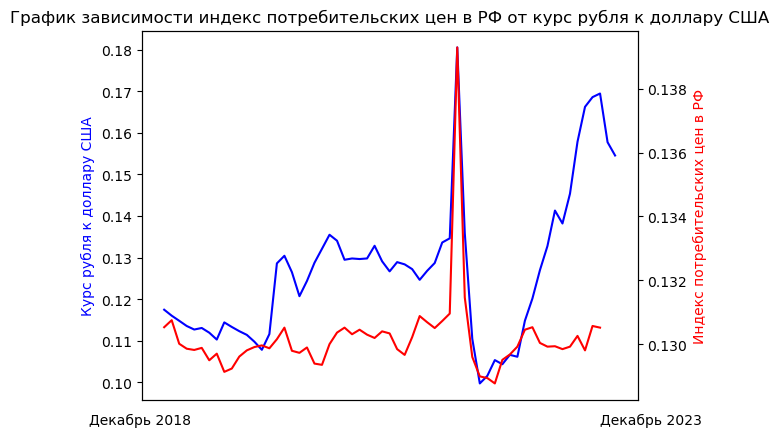

In [100]:
fig, ax1 = plt.subplots()
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax2 = ax1.twinx()
ax1.plot(normalized_ruble_rate.tolist()[0], color='blue')
ax2.plot(normalized_price_index.tolist()[0], color='red')
ax1.set_ylabel('Курс рубля к доллару США', color='blue')
ax2.set_ylabel('Индекс потребительских цен в РФ', color='red')
plt.title('График зависимости индекс потребительских цен в РФ от курс рубля к доллару США')
plt.text(-10, 0.1275, 'Декабрь 2018')
plt.text(58, 0.1275, 'Декабрь 2023')
plt.show()

### Часть 5. Выводы

Курс рубля за последние 5 лет показывает нисходящую динамику (доллар растет, а рубль падает), с достаточно большими колебаниями. 
Индекс потребительских цен является одним из ключевых показателей, используемых для измерения инфляции в экономике. Он рассчитывается на основе изменений цен на товары и услуги, которые потребители обычно покупают.
Индекс потребительских цен показывает, насколько цены на эти товары и услуги изменились за определенный период времени, и используется для корректировки номинальных показателей, таких как заработная плата, пенсии и социальные выплаты, чтобы учесть влияние инфляции.
Видно, что значительное влияние на рост доллара и инфляции оказало начало СВО в феврале 2022 года, показатели находились на пиковых значениях, значительно выше исторических за последние 5 лет.
С помощью графиков выявлены закономерности:
- С ростом курса доллара (и соотв. падением курса рубля) происходит рост индекса потребительских цен
- Чем более шоковое происходит событие и соотв. чем более резко (быстро) растет доллар, тем сильнее растет индекс потребительских цен. Пиком является начало СВО, так как курс доллара выраз за несколько дней до ~105 рублей, что сопровождалось ростом индекса цен до 108. Однако, когда доллар в течении года рос с ~55 до ~100 рублей, и это было плавно и более ожидаемо со стороны населения, индекс цен тоже рос, но соизмеримо с историческими значениями (без резкого высплеска).